#  Training Deep Neural Networks

### Import Libraries

In [1]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

2023-10-05 11:42:10.302918: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Vanishing/Exploding Gradients Problem

In [2]:
def logit(z):
    return 1 / (1 + np.exp(-z))

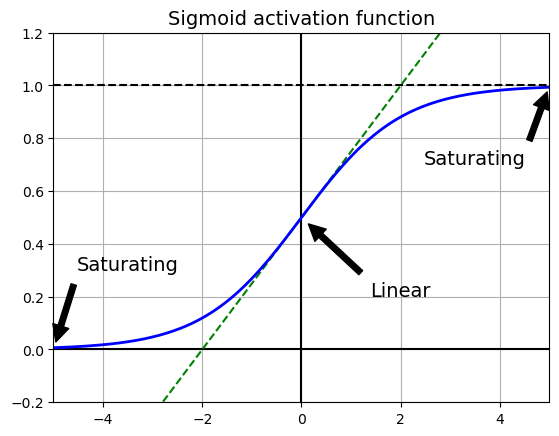

In [3]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

### Xavier and He Initialization

In [4]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [5]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [6]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

### Nonsaturating Activation Functions

#### Leaky ReLU

In [7]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

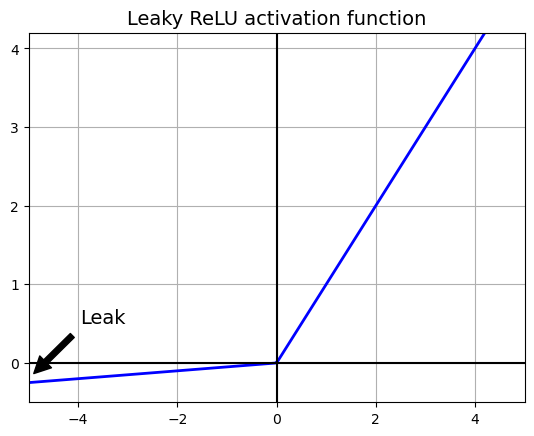

In [8]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

plt.show()

In [9]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [10]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [11]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

2023-10-05 11:42:41.984691: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [14]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 3ms/step - loss: 1.3102 - accuracy: 0.6082 - val_loss: 0.8721 - val_accuracy: 0.7330
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7811 - accuracy: 0.7499 - val_loss: 0.6990 - val_accuracy: 0.7730
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6687 - accuracy: 0.7829 - val_loss: 0.6345 - val_accuracy: 0.7972
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6111 - accuracy: 0.7996 - val_loss: 0.5810 - val_accuracy: 0.8116
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5744 - accuracy: 0.8106 - val_loss: 0.5514 - val_accuracy: 0.8196
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5484 - accuracy: 0.8162 - val_loss: 0.5293 - val_accuracy: 0.8250
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5288 - accuracy: 0.8215 - val_loss: 0.5113 - val_accuracy:

In [15]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [17]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.2939 - accuracy: 0.6285 - val_loss: 0.8549 - val_accuracy: 0.7352
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7687 - accuracy: 0.7550 - val_loss: 0.6806 - val_accuracy: 0.7832
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6563 - accuracy: 0.7857 - val_loss: 0.6163 - val_accuracy: 0.8008
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5994 - accuracy: 0.8020 - val_loss: 0.5640 - val_accuracy: 0.8190
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5630 - accuracy: 0.8130 - val_loss: 0.5340 - val_accuracy: 0.8254
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5368 - accuracy: 0.8187 - val_loss: 0.5121 - val_accuracy: 0.8340
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5170 - accuracy: 0.8242 - val_loss: 0.4938 - val_accuracy:

#### ELU

In [18]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

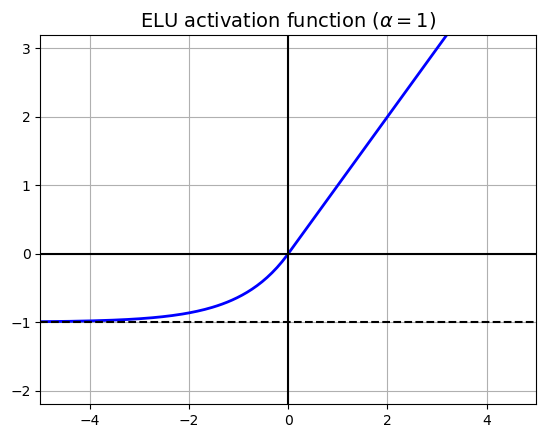

In [19]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [20]:
keras.layers.Dense(10, activation="elu")

#### SELU

In [21]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [22]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

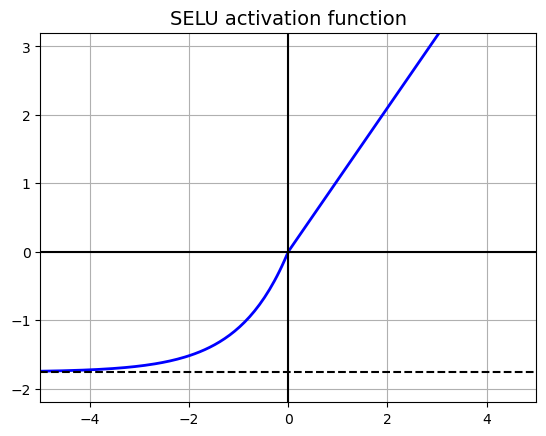

In [23]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [24]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [25]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

In [26]:
np.random.seed(42)
tf.random.set_seed(42)

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [28]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [29]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [30]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 26s 14ms/step - loss: 1.3686 - accuracy: 0.4643 - val_loss: 1.0060 - val_accuracy: 0.5900
Epoch 2/5
1719/1719 [==============================] - 27s 15ms/step - loss: 0.9203 - accuracy: 0.6512 - val_loss: 0.7200 - val_accuracy: 0.7414
Epoch 3/5
1719/1719 [==============================] - 28s 17ms/step - loss: 0.7528 - accuracy: 0.7308 - val_loss: 0.6897 - val_accuracy: 0.7480
Epoch 4/5
1719/1719 [==============================] - 31s 18ms/step - loss: 0.7115 - accuracy: 0.7399 - val_loss: 0.6384 - val_accuracy: 0.7756
Epoch 5/5
1719/1719 [==============================] - 31s 18ms/step - loss: 0.5846 - accuracy: 0.7914 - val_loss: 0.5729 - val_accuracy: 0.7982


In [31]:
np.random.seed(42)
tf.random.set_seed(42)

In [32]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [33]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [34]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 27s 14ms/step - loss: 1.9345 - accuracy: 0.2204 - val_loss: 1.8348 - val_accuracy: 0.2330
Epoch 2/5
1719/1719 [==============================] - 27s 16ms/step - loss: 1.5164 - accuracy: 0.3712 - val_loss: 1.2474 - val_accuracy: 0.4874
Epoch 3/5
1719/1719 [==============================] - 27s 15ms/step - loss: 1.1284 - accuracy: 0.5322 - val_loss: 1.0937 - val_accuracy: 0.5144
Epoch 4/5
1719/1719 [==============================] - 26s 15ms/step - loss: 0.9169 - accuracy: 0.6279 - val_loss: 0.9250 - val_accuracy: 0.6074
Epoch 5/5
1719/1719 [==============================] - 29s 17ms/step - loss: 0.8219 - accuracy: 0.6661 - val_loss: 0.7877 - val_accuracy: 0.6856


### Batch Normalization

#### Implementing Batch Normalization with Keras

In [35]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_212 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_213 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [37]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [38]:
#bn1.updates #deprecated

In [39]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [40]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.8614 - accuracy: 0.7104 - val_loss: 0.5632 - val_accuracy: 0.8150
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5793 - accuracy: 0.7986 - val_loss: 0.4851 - val_accuracy: 0.8418
Epoch 3/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.5228 - accuracy: 0.8195 - val_loss: 0.4481 - val_accuracy: 0.8502
Epoch 4/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4820 - accuracy: 0.8312 - val_loss: 0.4242 - val_accuracy: 0.8564
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4566 - accuracy: 0.8383 - val_loss: 0.4095 - val_accuracy: 0.8612
Epoch 6/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4378 - accuracy: 0.8459 - val_loss: 0.3942 - val_accuracy: 0.8634
Epoch 7/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4242 - accuracy: 0.8507 - val_loss: 0.3841 - val_ac

In [41]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [42]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [43]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 1.0132 - accuracy: 0.6806 - val_loss: 0.6499 - val_accuracy: 0.7930
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6558 - accuracy: 0.7883 - val_loss: 0.5376 - val_accuracy: 0.8242
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5808 - accuracy: 0.8067 - val_loss: 0.4880 - val_accuracy: 0.8394
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5336 - accuracy: 0.8195 - val_loss: 0.4562 - val_accuracy: 0.8464
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5021 - accuracy: 0.8281 - val_loss: 0.4363 - val_accuracy: 0.8544
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4820 - accuracy: 0.8338 - val_loss: 0.4189 - val_accuracy: 0.8590
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4655 - accuracy: 0.8401 - val_loss: 0.4070 - val_accuracy:

### Gradient Clipping

In [44]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [45]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

### Reusing Pretrained Layers

In [46]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [47]:
X_train_A.shape

(43986, 28, 28)

In [48]:
X_train_B.shape

(200, 28, 28)

In [49]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [50]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [51]:
tf.random.set_seed(42)
np.random.seed(42)

In [52]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [53]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [54]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.6402 - accuracy: 0.7956 - val_loss: 0.4015 - val_accuracy: 0.8615
Epoch 2/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.3674 - accuracy: 0.8727 - val_loss: 0.3317 - val_accuracy: 0.8827
Epoch 3/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.3263 - accuracy: 0.8856 - val_loss: 0.3035 - val_accuracy: 0.8984
Epoch 4/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.3056 - accuracy: 0.8933 - val_loss: 0.2891 - val_accuracy: 0.8999
Epoch 5/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2914 - accuracy: 0.8989 - val_loss: 0.2777 - val_accuracy: 0.9063
Epoch 6/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2808 - accuracy: 0.9032 - val_loss: 0.2713 - val_accuracy: 0.9061
Epoch 7/20
1375/1375 [==============================] - 5s 3ms/step - loss: 0.2720 - accuracy: 0.9057 - val_loss: 0.2709 - val_accuracy:

In [55]:
model_A.save("my_model_A.h5")

In [56]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [57]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [58]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 41ms/step - loss: 0.7659 - accuracy: 0.5050 - val_loss: 0.6154 - val_accuracy: 0.6897
Epoch 2/20
7/7 [==============================] - 0s 16ms/step - loss: 0.5129 - accuracy: 0.7750 - val_loss: 0.4723 - val_accuracy: 0.8103
Epoch 3/20
7/7 [==============================] - 0s 15ms/step - loss: 0.3842 - accuracy: 0.8850 - val_loss: 0.3847 - val_accuracy: 0.8722
Epoch 4/20
7/7 [==============================] - 0s 15ms/step - loss: 0.3065 - accuracy: 0.9350 - val_loss: 0.3235 - val_accuracy: 0.8955
Epoch 5/20
7/7 [==============================] - 0s 18ms/step - loss: 0.2506 - accuracy: 0.9600 - val_loss: 0.2818 - val_accuracy: 0.9148
Epoch 6/20
7/7 [==============================] - 0s 20ms/step - loss: 0.2134 - accuracy: 0.9750 - val_loss: 0.2511 - val_accuracy: 0.9239
Epoch 7/20
7/7 [==============================] - 0s 15ms/step - loss: 0.1856 - accuracy: 0.9800 - val_loss: 0.2305 - val_accuracy: 0.9320
Epoch 8/20
7/7 [===========

In [59]:
model_B.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_224 (Dense)           (None, 300)               235500    
                                                                 
 dense_225 (Dense)           (None, 100)               30100     
                                                                 
 dense_226 (Dense)           (None, 50)                5050      
                                                                 
 dense_227 (Dense)           (None, 50)                2550      
                                                                 
 dense_228 (Dense)           (None, 50)                2550      
                                                                 
 dense_229 (Dense)           (None, 1)                

In [60]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [61]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [62]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

In [63]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 2s 264ms/step - loss: 2.1598 - accuracy: 0.1950 - val_loss: 1.9734 - val_accuracy: 0.2637
Epoch 2/4
7/7 [==============================] - 0s 18ms/step - loss: 1.9311 - accuracy: 0.2150 - val_loss: 1.7631 - val_accuracy: 0.3012
Epoch 3/4
7/7 [==============================] - 0s 17ms/step - loss: 1.7174 - accuracy: 0.2650 - val_loss: 1.5701 - val_accuracy: 0.3377
Epoch 4/4
7/7 [==============================] - 0s 17ms/step - loss: 1.5224 - accuracy: 0.3050 - val_loss: 1.3956 - val_accuracy: 0.3742
Epoch 1/16
7/7 [==============================] - 1s 42ms/step - loss: 0.9646 - accuracy: 0.4800 - val_loss: 0.5545 - val_accuracy: 0.7039
Epoch 2/16
7/7 [==============================] - 0s 19ms/step - loss: 0.4492 - accuracy: 0.7750 - val_loss: 0.3288 - val_accuracy: 0.8611
Epoch 3/16
7/7 [==============================] - 0s 17ms/step - loss: 0.2774 - accuracy: 0.9000 - val_loss: 0.2350 - val_accuracy: 0.9280
Epoch 4/16
7/7 [==============

In [64]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.1066 - accuracy: 0.9775


[0.10664333403110504, 0.9775000214576721]

In [65]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.0664 - accuracy: 0.9915


[0.06635726988315582, 0.9915000200271606]

In [66]:
(100 - 97.05) / (100 - 99.40)

4.916666666666718

### Faster Optimizer

#### Momentum optimization 

In [68]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

#### Nesterov Accelerated Gradient

In [69]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

#### AdaGrad 

In [70]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

#### RMSProp 

In [71]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

#### Adam Optimization 

In [72]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

#### Adamax Optimization 

In [73]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

#### Nadam Optimization

In [74]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

### Learning Rate Scheduling

#### Power Scheduling 

In [75]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

In [76]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [77]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4904 - accuracy: 0.8277 - val_loss: 0.4050 - val_accuracy: 0.8578
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3805 - accuracy: 0.8653 - val_loss: 0.3702 - val_accuracy: 0.8724
Epoch 3/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3468 - accuracy: 0.8765 - val_loss: 0.3704 - val_accuracy: 0.8718
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3257 - accuracy: 0.8850 - val_loss: 0.3491 - val_accuracy: 0.8784
Epoch 5/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3104 - accuracy: 0.8898 - val_loss: 0.3442 - val_accuracy: 0.8764
Epoch 6/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2970 - accuracy: 0.8941 - val_loss: 0.3419 - val_accuracy: 0.8820
Epoch 7/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2869 - accuracy: 0.8977 - val_loss: 0.3369 - val_accura

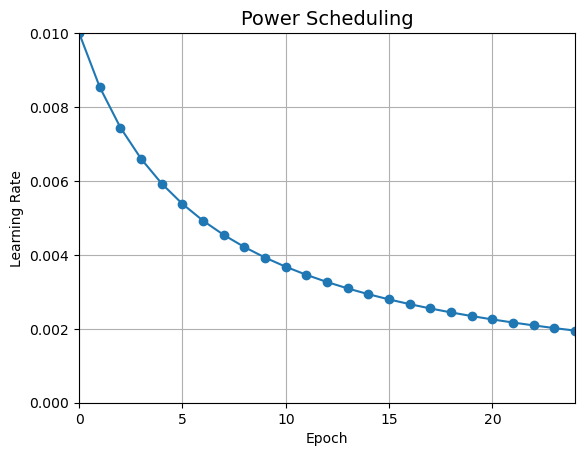

In [78]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

#### Exponential Scheduling

In [79]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [80]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [81]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [82]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 16s 9ms/step - loss: 0.8641 - accuracy: 0.7505 - val_loss: 0.8397 - val_accuracy: 0.7246 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.6892 - accuracy: 0.7948 - val_loss: 0.7150 - val_accuracy: 0.8108 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5711 - accuracy: 0.8212 - val_loss: 0.7040 - val_accuracy: 0.8082 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5340 - accuracy: 0.8329 - val_loss: 0.4817 - val_accuracy: 0.8418 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4771 - accuracy: 0.8523 - val_loss: 0.4948 - val_accuracy: 0.8622 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 19s 11ms/step - loss: 0.4466 - accuracy: 0.8590 - val_loss: 0.4699 - val_accuracy: 0.8546 - lr: 0.0056
Epoch 7/25
1719/1719 [=============================

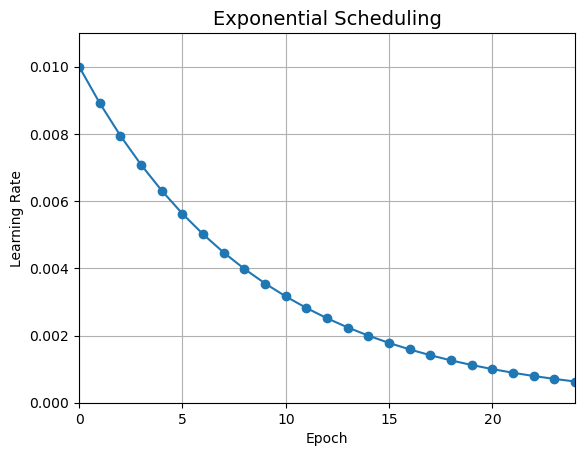

In [83]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [84]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

In [85]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # Note: the `batch` argument is reset at each epoch
        lr = K.get_value(self.model.optimizer.learning_rate)
        K.set_value(self.model.optimizer.learning_rate, lr * 0.1**(1 / self.s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.learning_rate)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 20s 11ms/step - loss: 0.7700 - accuracy: 0.7723 - val_loss: 0.7201 - val_accuracy: 0.7866 - lr: 0.0089
Epoch 2/25
1719/1719 [==============================] - 18s 11ms/step - loss: 0.6327 - accuracy: 0.8078 - val_loss: 0.5388 - val_accuracy: 0.8422 - lr: 0.0079
Epoch 3/25
1719/1719 [==============================] - 19s 11ms/step - loss: 0.5762 - accuracy: 0.8218 - val_loss: 0.7086 - val_accuracy: 0.8150 - lr: 0.0071
Epoch 4/25
1719/1719 [==============================] - 20s 11ms/step - loss: 0.5007 - accuracy: 0.8423 - val_loss: 0.4600 - val_accuracy: 0.8580 - lr: 0.0063
Epoch 5/25
1719/1719 [==============================] - 18s 11ms/step - loss: 0.4432 - accuracy: 0.8576 - val_loss: 0.4989 - val_accuracy: 0.8674 - lr: 0.0056
Epoch 6/25
1719/1719 [==============================] - 24s 14ms/step - loss: 0.4218 - accuracy: 0.8673 - val_loss: 0.4708 - val_accuracy: 0.8620 - lr: 0.0050
Epoch 7/25
1719/1719 [========================

In [86]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

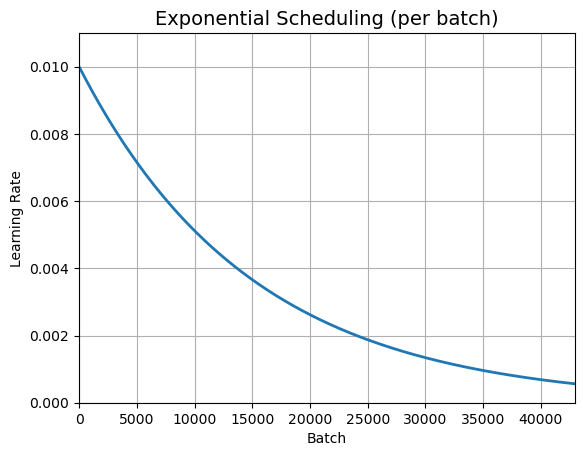

In [87]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

#### Piecewise Constant Scheduling

In [88]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [89]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [90]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 15s 8ms/step - loss: 0.8622 - accuracy: 0.7571 - val_loss: 1.1026 - val_accuracy: 0.6826 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 18s 10ms/step - loss: 0.7907 - accuracy: 0.7676 - val_loss: 0.7906 - val_accuracy: 0.7482 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 17s 10ms/step - loss: 0.8831 - accuracy: 0.7470 - val_loss: 1.3323 - val_accuracy: 0.6712 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 16s 9ms/step - loss: 0.9159 - accuracy: 0.7028 - val_loss: 0.9234 - val_accuracy: 0.6744 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 13s 8ms/step - loss: 0.9556 - accuracy: 0.6923 - val_loss: 1.1749 - val_accuracy: 0.6132 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.6518 - accuracy: 0.7707 - val_loss: 0.6610 - val_accuracy: 0.8114 - lr: 0.0050
Epoch 7/25
1719/1719 [============================

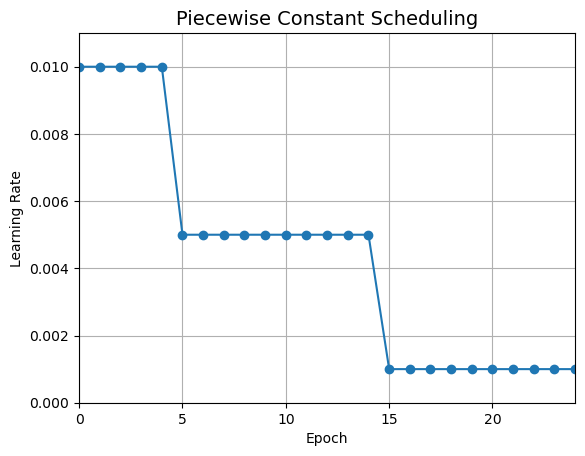

In [91]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

#### Performance Scheduling

In [92]:
tf.random.set_seed(42)
np.random.seed(42)

In [93]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5983 - accuracy: 0.8049 - val_loss: 0.4552 - val_accuracy: 0.8440 - lr: 0.0200
Epoch 2/25
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4985 - accuracy: 0.8397 - val_loss: 0.5610 - val_accuracy: 0.8366 - lr: 0.0200
Epoch 3/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4950 - accuracy: 0.8430 - val_loss: 0.5583 - val_accuracy: 0.8384 - lr: 0.0200
Epoch 4/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5084 - accuracy: 0.8479 - val_loss: 0.4767 - val_accuracy: 0.8562 - lr: 0.0200
Epoch 5/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5209 - accuracy: 0.8502 - val_loss: 0.5141 - val_accuracy: 0.8374 - lr: 0.0200
Epoch 6/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5202 - accuracy: 0.8531 - val_loss: 0.5697 - val_accuracy: 0.8330 - lr: 0.0200
Epoch 7/25
1719/1719 [==============================] - 

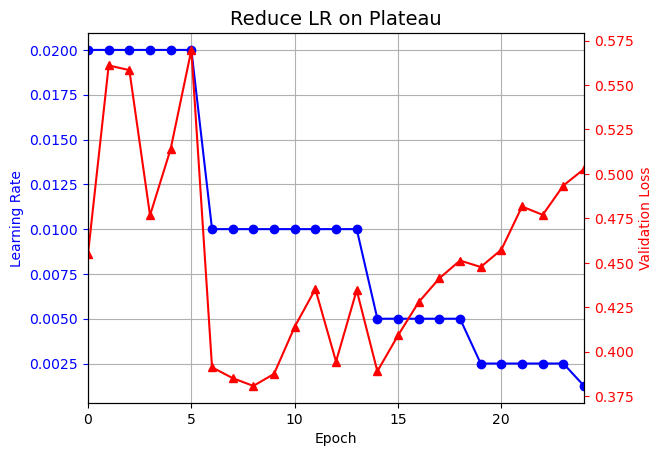

In [94]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

In [95]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4867 - accuracy: 0.8301 - val_loss: 0.4043 - val_accuracy: 0.8600
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3776 - accuracy: 0.8673 - val_loss: 0.3731 - val_accuracy: 0.8696
Epoch 3/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3434 - accuracy: 0.8766 - val_loss: 0.3744 - val_accuracy: 0.8674
Epoch 4/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3217 - accuracy: 0.8846 - val_loss: 0.3485 - val_accuracy: 0.8750
Epoch 5/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3057 - accuracy: 0.8907 - val_loss: 0.3399 - val_accuracy: 0.8760
Epoch 6/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2913 - accuracy: 0.8958 - val_loss: 0.3374 - val_accuracy: 0.8790
Epoch 7/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2811 - accuracy: 0.8996 - val_loss: 0.3347 - val_accuracy:

In [96]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

#### 1Cycle scheduling

In [97]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [98]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

430/430 [==============================] - 3s 5ms/step - loss: nan - accuracy: 0.3752


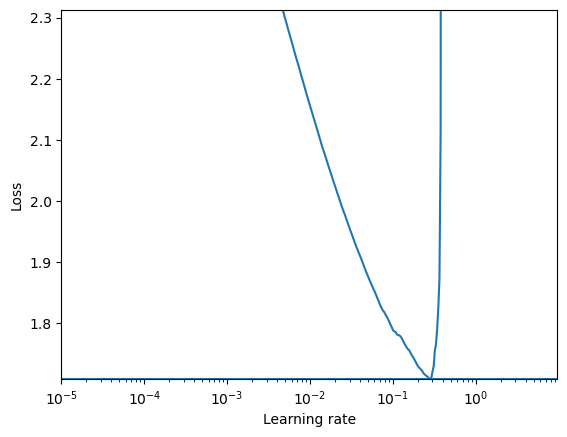

In [99]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [100]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [101]:
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/25
430/430 [==============================] - 2s 4ms/step - loss: 0.6570 - accuracy: 0.7732 - val_loss: 0.4864 - val_accuracy: 0.8350
Epoch 2/25
430/430 [==============================] - 2s 4ms/step - loss: 0.4564 - accuracy: 0.8384 - val_loss: 0.4312 - val_accuracy: 0.8544
Epoch 3/25
430/430 [==============================] - 3s 6ms/step - loss: 0.4110 - accuracy: 0.8541 - val_loss: 0.4142 - val_accuracy: 0.8584
Epoch 4/25
430/430 [==============================] - 3s 6ms/step - loss: 0.3827 - accuracy: 0.8645 - val_loss: 0.3877 - val_accuracy: 0.8676
Epoch 5/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3620 - accuracy: 0.8716 - val_loss: 0.3757 - val_accuracy: 0.8690
Epoch 6/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3433 - accuracy: 0.8773 - val_loss: 0.3687 - val_accuracy: 0.8764
Epoch 7/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3298 - accuracy: 0.8822 - val_loss: 0.3643 - val_accuracy: 0.8752
Epoch 

### Avoiding Overfitting Through Regularization 

####  L1 and  L2 regularization 